# Beta分布

In [1]:
#coding:utf-8
%matplotlib inline
import numpy as np
import scipy
from scipy.special import comb
import matplotlib.pyplot as plt
import cv2
from scipy import stats

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [14]:
def noise_beta(M,N,a=1,b=1):
    dst = np.zeros((M,N),dtype=np.float64)
    
    def gam(z):
        umax = 10
        T = 0
        for i in range(umax):
            T = T + i ** (z - 1) * np.exp(-i)
        return T
    eps = 1.0e-5
    for i in range(M):
        for j in range(N):
            x = np.random.rand()
            dst[i,j] = gam((a+b)) / (gam(a) * gam(b) + eps) * \
                    ((1 - x) ** (b - 1)) * (x ** (a - 1))
    return dst

In [15]:
noise = noise_beta(src.shape[0],src.shape[1],5,2)
# print(noise)


[[1.77601673e-01 2.13881470e+00 1.67031550e-02 ... 1.89530121e+00
  6.09734558e-03 3.71567628e-04]
 [1.09023872e+00 2.40660912e-01 1.67190208e+00 ... 1.72543202e+00
  2.01811060e+00 2.14904019e+00]
 [1.01878404e+00 1.47030020e-01 1.15868195e-03 ... 1.56361121e-01
  4.75236471e-03 1.90805755e+00]
 ...
 [1.60228962e-01 1.04939899e+00 7.28251667e-01 ... 5.62192336e-01
  1.49842122e+00 1.61665838e-01]
 [3.43820133e-02 4.18710848e-01 1.06814206e+00 ... 1.46841618e+00
  1.87027660e+00 6.63711539e-02]
 [4.86380088e-03 1.33138586e+00 1.19189429e+00 ... 2.10086112e+00
  2.79386000e-02 1.11594821e+00]]


In [16]:
src_noise = np.zeros_like(src)
noise_uint8 = cv2.convertScaleAbs(noise * 255)
src_noise[:,:,0] = src[:,:,0] + noise_uint8
src_noise[:,:,1] = src[:,:,1] + noise_uint8
src_noise[:,:,2] = src[:,:,2] + noise_uint8

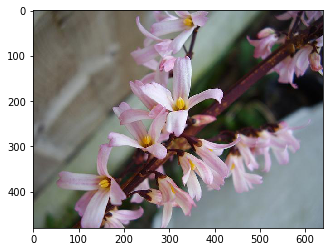

In [17]:
plt.imshow(src)

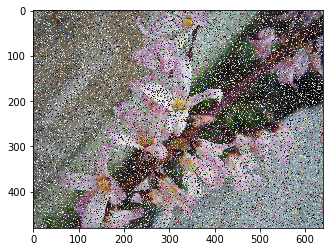

In [18]:
plt.imshow(src_noise)

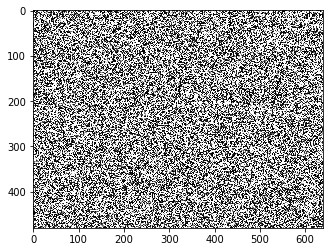

In [19]:
plt.imshow(noise_uint8,'gray')